In [1]:
%load_ext autoreload
%autoreload 2

# INSTALL

# IMPORTS

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import json
from src.load_data import load_all

# CONSTANTS

In [4]:
pd.set_option("display.max_rows", 3500)
pd.set_option("display.max_columns", 200)

In [5]:
YEARS = range(2006, 2023)

# FUNCTIONS

In [6]:
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.ERROR)

# LOAD DATA

In [7]:
data_dict=load_all(years = [2006, 2007, 2008])

INFO:__name__:Successfully loaded data: 2006
INFO:__name__:Successfully loaded data: 2007
INFO:__name__:Successfully loaded data: 2008


In [8]:
data_dict[2006]

,st_fips,state_name,place_name,place_govt,place_Pres_dem2pv,place_Pres_dem2pv_last,place_Gov_dem2pv,place_Gov_dem2pv_last,place_House_dem2pv,place_House_dem2pv_last,place_Sen_dem2pv,place_Sen_dem2pv_last,census_2010_pop,census_2010_pop_est,census_2015_pop_est,acs_2018_white,acs_2018_black,acs_2018_hispanic,acs_2018_pop,channel_id,channel_title,vid_id,vid_title,vid_desc,vid_length_min,vid_upload_date,vid_livestreamed,vid_views,vid_likes,vid_dislikes,vid_comments,vid_favorites,meeting_date,caption_text,caption_text_clean,channelType
0,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,JSTYbP5HvZQ,"League City Council Meeting for November 14, 2006",This file was provided for public viewing by J...,155.916667,2011-04-25,0,8,0,0,0,0,2006-11-14,{00:00:21} tell me when okay fellas were up go...,{00:00:21} tell me when okay fellas were up go...,INDEPENDENT
1,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,UbL-PG4H2kQ,"League City Council Meeting for October 24, 2006",This file was provided for public viewing by J...,149.816667,2011-04-25,0,12,0,0,0,0,2006-10-24,{00:00:24} alright alright let's welcome every...,{00:00:24} alright alright let's welcome every...,INDEPENDENT
2,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,8foq04n_dYU,"League City Council Meeting for December 12, 2006",This file was provided for public viewing by J...,124.016667,2011-04-25,0,8,0,0,0,0,2006-12-12,{00:00:41} Your Honor okay good afternoon will...,{00:00:41} Your Honor okay good afternoon will...,INDEPENDENT
3,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,KUXXWr_l8D8,"League City Council Meeting for November 28, 2006",This file was provided for public viewing by J...,109.733333,2011-04-25,0,0,0,0,0,0,2006-11-28,{00:00:28} okay good afternoon we will call th...,{00:00:28} okay good afternoon we will call th...,INDEPENDENT
4,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,qGtr7TxXdIE,"League City Council Meeting for October 10, 2006",This file was provided for public viewing by J...,61.650000,2011-04-25,0,2,0,0,0,0,2006-10-10,{00:00:32} okay we're up good afternoon we cal...,{00:00:32} okay we're up good afternoon we cal...,INDEPENDENT
5,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,0bHgnNOsa-k,"League City Council Meeting for September 12, ...",This file was provided for public viewing by J...,229.933333,2011-04-25,0,3,0,0,0,0,2006-09-12,NaN,NaN,INDEPENDENT
6,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,4Jq6wPKpjqE,"League City Council Meeting for August 8, 2006",This file was provided for public viewing by J...,111.550000,2011-04-25,0,0,0,0,0,0,2006-08-08,{00:00:12} thank you okay super hot good even...,{00:00:12} thank you okay super hot good even...,INDEPENDENT
7,4841980,Texas,League City city,MUNICIPAL COUNCIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83560,84085,98312,81136,8009,20271,100832,UCadNIUcS5YV31Ytn75O9DDg,Jimmy Trojanowski,yoxbFoeGQTA,"League City Council Meeting for September 26, ...",This file was provided for public viewing by J...,59.466667,2011-04-25,0,0,0,0,0,0,2006-09-26,{00:00:17} six we have a pub someone say hold ...,{00:00:17} six we have a pub someone say hold ...,INDEPENDENT
8,4841980,Texas,League City city,MUNICIPAL COUNCIL,

# TO DO LIST

### Speech 2  Text
* KAS - With speaker tracking

### Data Cleaning
* RAY - Remove location name from transcripts
* RAY - Remove us, american, 

### Summary Statistics
* Number of words per meeting (avg.)
* Number of unique words per meeting
* Number of sentences per meeting - need to find this code
* Time elapsed per meeting
* Freq dist of uni, bi, tri - grams
* What times are the meetings held?

### Fancier Techniques
* RAY - Topic Modeling -  LDA
* NER - Start Here!
* Sentiment Analysis
* Text Classification - we have hard coded topics
* Co-occurance Networks
* Speaker Analysis (who, how long do they chat for,)
* Keyword Extraction
* Speech Acts Analysis
* Readibilty Analysis
* Stance Direction
* Summarization
* Agenda Identification/Extraction
* Decision Extraction

### NER
* KAS - Add entities such as city attourney, etc. (public roles and titles)

### Trends over time
* Trending Topics
* Keyword Tracking - hashtags in posts

### Question List
* who determines the agenda for meetings?
* who dominates the meeting?
* What is the vote breakdown? Are the agenda items only things that will pass?
* Are there datasets worth pulling in to enhance the storytelling power? census data, tiger data, & property taxes/assessment,  twitter

# EXPLORE

In [9]:
df = data_dict[2006]
#print(df.loc[0, 'caption_text_clean'])

In [10]:
df.columns

Index(['st_fips', 'state_name', 'place_name', 'place_govt',
       'place_Pres_dem2pv', 'place_Pres_dem2pv_last', 'place_Gov_dem2pv',
       'place_Gov_dem2pv_last', 'place_House_dem2pv',
       'place_House_dem2pv_last', 'place_Sen_dem2pv', 'place_Sen_dem2pv_last',
       'census_2010_pop', 'census_2010_pop_est', 'census_2015_pop_est',
       'acs_2018_white', 'acs_2018_black', 'acs_2018_hispanic', 'acs_2018_pop',
       'channel_id', 'channel_title', 'vid_id', 'vid_title', 'vid_desc',
       'vid_length_min', 'vid_upload_date', 'vid_livestreamed', 'vid_views',
       'vid_likes', 'vid_dislikes', 'vid_comments', 'vid_favorites',
       'meeting_date', 'caption_text', 'caption_text_clean', 'channelType'],
      dtype='object')

In [11]:
df['state_name'].unique()

array(['Texas', 'California'], dtype=object)

In [12]:
df.loc[0, 'vid_id']

'JSTYbP5HvZQ'

In [13]:
mtg_txt = df.loc[0, 'caption_text']
mtg_txt

"{00:00:21} tell me when okay fellas were up good  evening we will convene the City Council  of the City of League City regular  meeting November 14 2006 at 6pm call  roll Jerry Schultz here Ted Nelson Mike  Barbour prison Tommy combs here Chris  amazon fair Phyllis and born Sean kini  Jim Nelson item number two is the  invocation pledge of allegiance to the  US flag and the pledge of allegiance to  the Texas flag the invocation tonight  will be given by pastor Jerry Hatfield  of turning point church so if you'd come  forward if everybody would stand please  and this would be a good time to turn  off all phones and pagers let us pray  together father God we come to you in  the name of Jesus thank you for this  this group this council the mayor or God  you've given them great responsibility  we've elected them into this position  and there to lead our our city our  community thank you Lord for them I ask  you to bless them with wisdom and  guidance tonight Lord you you are the  foundati

In [14]:
json.dumps(df.loc[0, 'caption_text_clean'])

'"{00:00:21} tell me when okay fellas were up good  evening we will convene the City Council  of the City of League City regular  meeting November 14 2006 at 6pm call  roll Jerry Schultz here Ted Nelson Mike  Barbour prison Tommy combs here Chris  amazon fair Phyllis and born Sean kini  Jim Nelson item number two is the  invocation pledge of allegiance to the  US flag and the pledge of allegiance to  the Texas flag the invocation tonight  will be given by pastor Jerry Hatfield  of turning point church so if you\'d come  forward if everybody would stand please  and this would be a good time to turn  off all phones and pagers let us pray  together father God we come to you in  the name of Jesus thank you for this  this group this council the mayor or God  you\'ve given them great responsibility  we\'ve elected them into this position  and there to lead our our city our  community thank you Lord for them I ask  you to bless them with wisdom and  guidance tonight Lord you you are the  foun

In [15]:
from src.openai_client import OpenAI
import os

In [16]:
assert os.environ['OPENAI_API_KEY'] 

In [22]:
len(mtg_txt) *.10

13355.800000000001

In [31]:
prompt = f"Given the text below, summarize the public meeting. Include the top three topics, any major decisions as a bulleted list and if possible provide a bulleted list that could represent the meeting agenda /n {mtg_txt[0:13000]}"

In [32]:
#api_key = os.environ['OPENAI_API_KEY']
client = OpenAI()
resp = client.chat(prompt)

In [33]:
print(resp)

Summary of public meeting:

- The City Council of League City held a regular meeting on November 14, 2006
- The meeting began with an invocation and pledge of allegiance
- The top three topics discussed were employee benefits, recognition of a volunteer, and presentation on liability equity
- Major decisions: 
  - Proclamation honoring Mr. Sidney Matchett for his 25 years of volunteer service
  - Approval of minutes for October 4th workshop and October 10th regular meeting
  - Presentation of equity return check to the city
- Meeting agenda: 
  - Invocation and pledge of allegiance
  - Approval of minutes
  - Presentation of proclamation honoring Mr. Sidney Matchett
  - Presentation on liability equity
  - Public hearing and action items (none)
  - Citizens' request for hearing before City Council (public comments)


# Pre-processing
1. Lowercase
2. Remove Punctuation
3. Remove Custom Stop Words

In [16]:
# Convert to string and lowercase
df['caption_text_clean'] = df['caption_text_clean'].astype(str).str.lower()

# Remove punctuation
df['caption_text_clean'] = df['caption_text_clean'].str.replace('[^\w\s]', '', regex=True)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def create_stop_words(df_col, threshold=0.01):
    # Initialize TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the text
    X = vectorizer.fit_transform(df_col)

    # Calculate mean tf-idf for each word
    tfidf_mean = X.mean(axis=0)

    # Get a boolean mask for words that have mean tf-idf more than the threshold
    # and flatten it to be 1-dimensional
    mask = np.array(tfidf_mean > threshold).flatten()

    # Get the feature names (words) as a numpy array
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Select the words that have mean tf-idf more than the threshold
    stop_words = feature_names[mask]
    
    return stop_words

#Apply the function to the text column
stop_words = create_stop_words(df['caption_text_clean'], 0.03)
stop_words = stop_words.tolist()
stop_words.extend(['texas', 'california'])
print(len(stop_words))
print(stop_words)


24
['and', 'be', 'city', 'for', 'have', 'if', 'in', 'is', 'it', 'nan', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'we', 'with', 'would', 'you', 'texas', 'california']


In [18]:
# Here is your custom stop word list
stop_words = ['texas', 'california']

# Function to remove stop words
def remove_stop_words(text):
    words = text.split()  # split the text into words
    words = [word for word in words if word not in stop_words]  # remove the stop words
    text = ' '.join(words)  # join the words back into a single string
    return text

# Apply the function to the text column
df['caption_text_clean'] = df['caption_text_clean'].apply(remove_stop_words)


## Topic Modeling

In [13]:
!pip install pyLDAvis
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.5/379.5 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 61.2 MB/s eta 0:00:0000:0100:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136880 sha256=1b78467d2549931686354a5402b20aaca32add12c37f893cf6922bbbe964465e
  Stored in directory: /home/jupyter/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492022 sha256=854d5c6de1a8ee69197c0bb1394f128739461

In [17]:
from gensim import corpora
from gensim.models import Phrases
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
import re
import operator
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [20]:
df['caption_text_clean'] = df['caption_text_clean'].astype(str)

# Format each document as a list of tokens
doc_clean = [doc.split() for doc in df['caption_text_clean']]

# Add bigrams to documents
# Gensim Phrases detects bigrams via a scoring function and threshold
bigram = Phrases(doc_clean)
doc_clean = [bigram[line] for line in doc_clean]

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Filter out words that occur less than 10 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=1, no_above=0.9)   

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(doc_term_matrix))

INFO:gensim.models.phrases:collecting all words and their counts
INFO:gensim.models.phrases:PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:gensim.models.phrases:collected 67202 token types (unigram + bigrams) from a corpus of 139385 words and 17 sentences
INFO:gensim.models.phrases:merged Phrases<67202 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO:gensim.utils:Phrases lifecycle event {'msg': 'built Phrases<67202 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000> in 0.16s', 'datetime': '2023-06-10T17:03:06.146140', 'gensim': '4.2.0', 'python': '3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:21) \n[GCC 9.4.0]', 'platform': 'Linux-4.19.0-24-cloud-amd64-x86_64-with-debian-10.13', 'event': 'created'}
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<8959 unique tokens: ['$72', '0', '03', '1', '1.9']...> from 17 documents (total 127758 corpus po

Number of unique tokens: 8959
Number of documents: 17


In [22]:
def plot_coherence_scores(num_topics_range: range, coherence_values: list):
  """
    Plot the coherence scores for each number of topics
    
    Parameters
    ----------
    num_topics_range: range
        A the range of the number of topics. This is used for labeling the x-axis.
    coherence_values: list
        The coherence values for each number of topics from gensim's CoherenceModel.

    Returns
    -------
    None

    """
  plt.plot(num_topics_range, coherence_values)
  plt.xticks(np.arange(min(num_topics_range), max(num_topics_range)+1, 1.0))
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence score")
  plt.show()


In [23]:
def get_optimal_number_of_topics(num_topics_range: range, coherence_values: list) -> int:
  """
    Determines the optimal number of topics based on the maximum coherence score value.
    
    Parameters
    ----------
    num_topics_range: range
        A the range of the number of topics. This is used for labeling the x-axis.
    coherence_values: list
        The coherence values for each number of topics from gensim's CoherenceModel.

    Returns
    -------
    best_num_topics: int
      The optimal number of topics based on the maximum coherence value.

    """
  max_coherence_index = coherence_values.index(max(coherence_values))
  best_num_topics = num_topics_range[max_coherence_index]
  return best_num_topics


In [24]:
# Create a dictionary with topic number as key and list of words as values

def create_dict_from_topic_info(topics_with_topic_num: list) -> dict:
  """
    Creates a dictionary with key = topic number and value = list of topics.
    This allows for a more human-readable format than gensim provides.
    
    Parameters
    ----------
    topics_with_topic_num: range
        A list of tuples containing topic numbers, weights, and topics.

    Returns
    -------
    topic_dict: dict
      A dictionary with key = topic number and value = list of topics.

    """
  topic_dict = {}
  for item in topics_with_topic_num:
      key = item[0]
      topic_words = item[1]

      topic_words_clean = re.sub("[^a-zA-Z]", " ", topic_words)
      value = [topic for topic in topic_words_clean.split(" ") if topic != ""]
      topic_dict[key] = value
  
  return topic_dict


In [25]:
# Compute coherence values
coherence_values = []
model_list = []
start = 2
stop = 20
step = 1
num_topics_range = range(start, stop, step)

chunksize = 2000    #controls how many documents are processed at a time during training. Increasing chunksize speeds up training
passes = 20         #how often we train model on entire corpus
iterations = 400    #controls how ofter we repeat a particular loop over each document
eval_every = None   #Don't evaluate model perplexity, takes too much time.

for num_topics in num_topics_range:
  model = LdaModel(corpus=doc_term_matrix, num_topics=num_topics, id2word = dictionary, chunksize=chunksize, 
                   iterations=iterations, passes=passes, eval_every=eval_every, random_state=1913)
  model_list.append(model)
  coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary)
  coherence_values.append(coherencemodel.get_coherence())

INFO:gensim.models.ldamodel:using symmetric alpha at 0.5
INFO:gensim.models.ldamodel:using symmetric eta at 0.5
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 2 topics, 20 passes over the supplied corpus of 17 documents, updating model once every 17 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #17/17
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.046*"the" + 0.032*"to" + 0.028*"that" + 0.025*"and" + 0.019*"a" + 0.019*"of" + 0.018*"we" + 0.014*"is" + 0.014*"I" + 0.012*"it"
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.050*"the" + 0.034*"and" + 0.031*"to" + 0.027*"that" + 0.018*"a" + 0.016*"in" + 0.015*"is" + 0.013*"this" + 0.012*"of" + 0.012*"we"
INFO:gensim.models.ldamodel:topic diff=1.581980, rho=1.000000
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #17/17
INFO:g

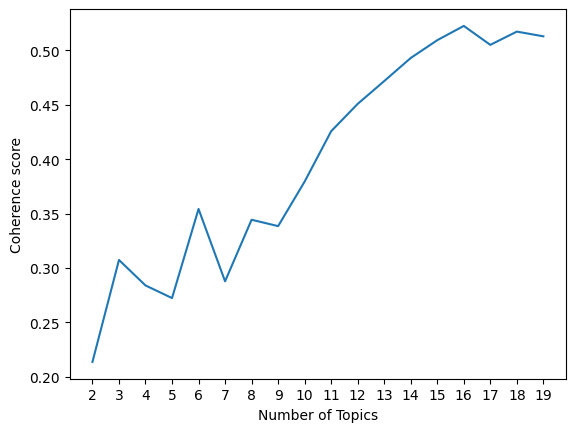

In [27]:
# Plot the coherence scores
plot_coherence_scores(num_topics_range=num_topics_range, coherence_values=coherence_values)

In [28]:
# Get the optimal number of topics
best_num_topics = get_optimal_number_of_topics(coherence_values=coherence_values, num_topics_range=num_topics_range)
print(best_num_topics)

16


In [29]:
#set training parameters
chunksize = 2000    #controls how many documents are processed at a time during training. Increasing chunksize speeds up training
passes = 20         #how often we train model on entire corpus
iterations = 400    #controls how ofter we repeat a particular loop over each document
eval_every = None   #Don't evaluate model perplexity, takes too much time.

# Running and Training LDA model on the document term matrix.
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=best_num_topics, id2word = dictionary, chunksize=chunksize, 
                    iterations=iterations, passes=passes, eval_every=eval_every, random_state=1913)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.0625
INFO:gensim.models.ldamodel:using symmetric eta at 0.0625
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 16 topics, 20 passes over the supplied corpus of 17 documents, updating model once every 17 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #17/17
INFO:gensim.models.ldamodel:topic #10 (0.062): 0.044*"the" + 0.040*"to" + 0.035*"that" + 0.034*"and" + 0.018*"we" + 0.014*"is" + 0.014*"I" + 0.013*"a" + 0.013*"of" + 0.013*"in"
INFO:gensim.models.ldamodel:topic #4 (0.062): 0.045*"the" + 0.045*"and" + 0.030*"to" + 0.024*"a" + 0.021*"that" + 0.018*"of" + 0.014*"is" + 0.013*"we" + 0.012*"in" + 0.012*"you"
INFO:gensim.models.ldamodel:topic #3 (0.062): 0.039*"to" + 0.033*"the" + 0.028*"and" + 0.021*"that" + 0.016*"a" + 0.016*"we" +

In [30]:
# This shows the topic numbers with words
lda_topics_with_topic_num = ldamodel.show_topics(num_words=5)

In [31]:
lda_topic_dict = create_dict_from_topic_info(lda_topics_with_topic_num)

for value in lda_topic_dict.values():
  print(value)

['nan', 'Americans', 'Barnes', 'Berg', 'Aggies']
['the', 'that', 'and', 'to', 'of']
['the', 'to', 'and', 'that', 'a']
['Americans', 'Aggies', 'Barnes', 'Berg', 'Age']
['Americans', 'Aggies', 'Barnes', 'Berg', 'Age']
['Americans', 'Aggies', 'Barnes', 'Berg', 'Age']
['and', 'the', 'to', 'a', 'that']
['Americans', 'Aggies', 'Barnes', 'Berg', 'Age']
['Americans', 'Aggies', 'Barnes', 'Berg', 'Age']
['the', 'to', 'that', 'and', 'we']


In [32]:
# Visualize the topics
# NOTE LSA cannot be visualized with PyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.322680  0.000005       1        1  99.987320
1      0.027668  0.004018       2        1   0.003767
0      0.025336 -0.000431       3        1   0.000637
2      0.025436 -0.000443       4        1   0.000637
3      0.022566 -0.000196       5        1   0.000637
4     -0.000537  0.000061       6        1   0.000637
6      0.012448  0.000203       7        1   0.000637
7      0.025436 -0.000443       8        1   0.000637
8      0.024324 -0.000337       9        1   0.000637
9      0.025437 -0.000441      10        1   0.000637
10     0.007384  0.000220      11        1   0.000637
11     0.025436 -0.000443      12        1   0.000637
12     0.025436 -0.000443      13        1   0.000637
13     0.025436 -0.000443      14        1   0.000637
14     0.025436 -0.000443      15        1   0.000637
15     0.025436 -0.000443      16        1   0.000637, topic_info=                Term         Freq        Total Category  logprob  loglift
3067             the  6542.000000  6542.000000  Default  30.0000  30.0000
584              and  3978.000000  3978.000000  Default  29.0000  29.0000
3125              to  4308.000000  4308.000000  Default  28.0000  28.0000
3062            that  3750.000000  3750.000000  Default  27.0000  27.0000
452                a  2558.000000  2558.000000  Default  26.0000  26.0000
2230              of  2137.000000  2137.000000  Default  25.0000  25.0000
1828              is  1965.000000  1965.000000  Default  24.0000  24.0000
3297              we  2031.000000  2031.000000  Default  23.0000  23.0000
256                I  1594.000000  1594.000000  Default  22.0000  22.0000
1766              in  1654.000000  1654.000000  Default  21.0000  21.0000
3402             you  1501.000000  1501.000000  Default  20.0000  20.0000
3096            this  1580.000000  1580.000000  Default  19.0000  19.0000
1834              it  1437.000000  1437.000000  Default  18.0000  18.0000
1508             for  1420.000000  1420.000000  Default  17.0000  17.0000
2253              on  1200.000000  1200.000000  Default  16.0000  16.0000
1652            have  1152.000000  1152.000000  Default  15.0000  15.0000
2886              so   909.000000   909.000000  Default  14.0000  14.0000
3357            with   884.000000   884.000000  Default  13.0000  13.0000
1753              if   785.000000   785.000000  Default  12.0000  12.0000
3288             was   722.000000   722.000000  Default  11.0000  11.0000
2206             not   678.000000   678.000000  Default  10.0000  10.0000
808              but   677.000000   677.000000  Default   9.0000   9.0000
1242              do   621.000000   621.000000  Default   8.0000   8.0000
1874            just   602.000000   602.000000  Default   7.0000   7.0000
3326            what   636.000000   636.000000  Default   6.0000   6.0000
2277              or   561.000000   561.000000  Default   5.0000   5.0000
900             city   605.000000   605.000000  Default   4.0000   4.0000
720               be   561.000000   561.000000  Default   3.0000   3.0000
1835            it's   539.000000   539.000000  Default   2.0000   2.0000
630              are   512.000000   512.000000  Default   1.0000   1.0000
3067             the  6542.511547  6542.515565   Topic1  -2.9717   0.0001
3125              to  4308.107144  4308.110511   Topic1  -3.3895   0.0001
3062            that  3750.876922  3750.879948   Topic1  -3.5280   0.0001
584              and  3978.803819  3978.807479   Topic1  -3.4690   0.0001
452                a  2558.352941  2558.355682   Topic1  -3.9106   0.0001
2230              of  2137.618029  2137.620616   Topic1  -4.0903   0.0001
3297              we  2031.985372  2031.987850   Topic1  -4.1410   0.0001
1828              is  1965.160584  1965.163074   Topic1  -4.1744   0.0001
1766              in  1654.102079  1654.104445   Topic1  -4.3468   0.0001
3096            this  158

## NER

## Data Profile Report

In [ ]:
# Save the report to an HTML file
from IPython.display import HTML
profile = ProfileReport(df)
profile.to_file("profile_report.html")
HTML('./output/profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/ydata_profiling/model/correlations.py:72: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex from a duplicate axis')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Caption Distribution

<AxesSubplot:title={'center':'Tokens per Caption'}, xlabel='Tokens', ylabel='Number of Meetings'>

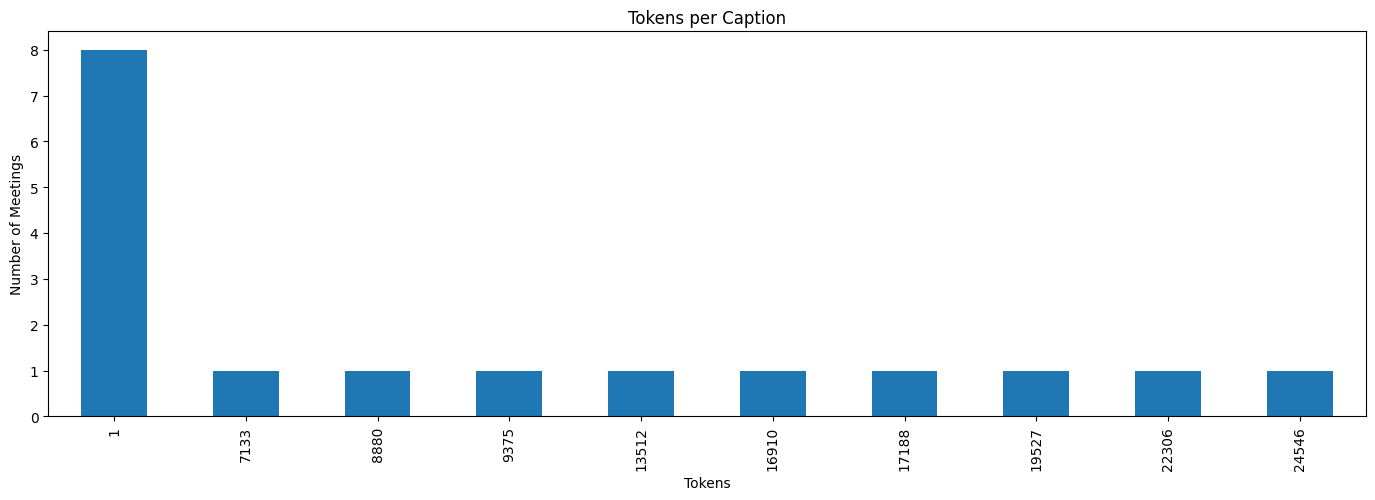

In [ ]:
#Analyze the token count with a bar chart
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 200
%matplotlib inline
import matplotlib.pyplot as plt

df['caption_text_clean'] = df['caption_text_clean'].astype(str)
df['caption_token_count'] = df['caption_text_clean'].apply(lambda x: len(x.split()))

df['caption_token_count'].value_counts().sort_index().plot.bar(figsize=(17,5), 
                                                                    title='Tokens per Caption',
                                                                    xlabel='Tokens',
                                                                    ylabel='Number of Meetings')

## Data Profile by Location

## Token Count

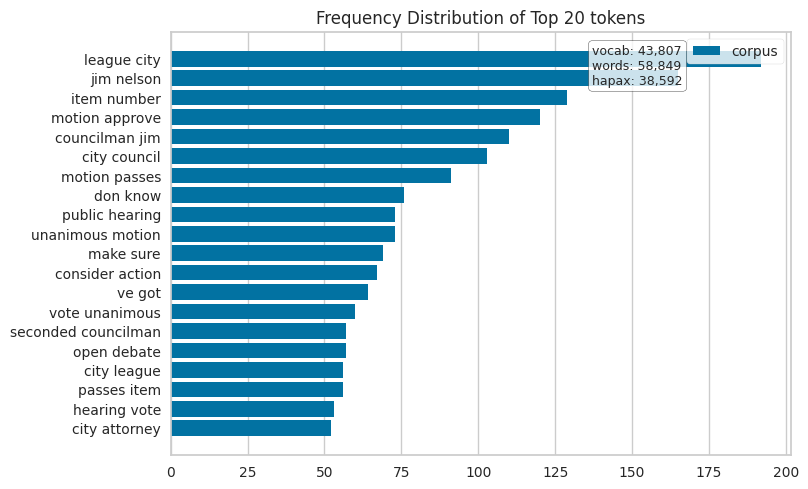

<AxesSubplot:title={'center':'Frequency Distribution of Top 20 tokens'}>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

corpus = df['caption_text_clean']

vectorizer = CountVectorizer(stop_words='english', ngram_range=(2,2))
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names_out()

visualizer = FreqDistVisualizer(features=features, n=20, orient='h')
visualizer.fit(docs)
visualizer.show()

## Similarity Matrix

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 51.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 9.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 62.2 MB/s eta 0:00:0000:0100:01
     ━━━━

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

corpus_list = df['caption_text_clean'].to_list()
similarity_row = []
similarity_matrix = []
for caption_1 in corpus_list:
  for caption_2 in corpus_list:
    embedding_1 = model.encode(caption_1).reshape(1, -1)
    embedding_2 = model.encode(caption_2).reshape(1, -1)
    cosine_similarity_metric = cosine_similarity(embedding_1, embedding_2)
    similarity_row.append(cosine_similarity_metric)
    print('%3f ' % cosine_similarity_metric, end="")
  print()
  similarity_matrix.append(similarity_row)
  similarity_row = []

OSError: /opt/conda/lib/python3.7/site-packages/nvidia/cublas/lib/libcublas.so.11: symbol cublasLtGetStatusString version libcublasLt.so.11 not defined in file libcublasLt.so.11 with link time reference

### Most Similar Captions

In [ ]:
# Reshape our matrix so we can fill the diagonal
similarity_matrix = np.array(similarity_matrix).reshape(len(corpus_list), len(corpus_list))

# Fill the values along the diagonal with 0, so we don't count them as most similar
np.fill_diagonal(similarity_matrix, 0)
indices = np.argwhere(similarity_matrix == similarity_matrix.max())

# Print the max similarity for our data set
print(f"Maximum cosine similarity: {similarity_matrix[indices[0][0], indices[1][0]]}")

# Print the review text
print(corpus_list[indices[0][0]])
print(corpus_list[indices[1][0]])

# OUTPUT